In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
sb.set()

pd.options.display.max_rows = 999

In [6]:
life_transform=pd.read_csv("dataset/life_transform.csv")
life_transform.drop(columns=life_transform.columns[0],axis=1,inplace=True)
print("Data dimensions",life_transform.shape)
life_transform.head()

Data dimensions (2938, 21)


,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

In [7]:
life_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   int64  
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

## Data spliting

To prevent overfitting on the train set leading to reduced accuracy on the test set, we will need to split the data into `TRAIN` and `TEST` before doing any form of feature selection. We split the data as early on as possible to prevent test data from contaminating our model during training.

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
X = pd.DataFrame(life_transform.loc[:,~life_transform.columns.isin(['COUNTRY','LIFE_EXPECTANCY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 19) (2350, 1)
Test Set  : (588, 19) (588, 1)


## Random Forest Regression with feature selection

This is taken from the same model in regression.ipynb and is chosen for being the most accurate model we have. We will now attempt to improve it further by doing K-Means clustering.

In [9]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    
    # learn relationship from training data ONLY
    fs.fit(X_train, y_train)
    
    #transform BOTH train and TEST
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f ' % (i, fs.scores_[i]))
   
#what are the features
X.columns[fs.get_support()]
Features=[]
for i in range(len(fs.get_support())):
    if fs.get_support()[i]== True:
        Features.append(X.columns[i])
print(Features)

Feature 0: 931.632690 
Feature 1: 62.121055 
Feature 2: 1596.325284 
Feature 3: 8.123077 
Feature 4: 387.431139 
Feature 5: 460.896530 
Feature 6: 221.037494 
Feature 7: 184.867789 
Feature 8: 977.376065 
Feature 9: 3.136827 
Feature 10: 916.584162 
Feature 11: 61.120337 
Feature 12: 939.608160 
Feature 13: 2854.530658 
Feature 14: 513.190948 
Feature 15: 1.277854 
Feature 16: 1316.357030 
Feature 17: 5301.080813 
Feature 18: 1746.096913 
['STATUS', 'ADULT_MORTALITY', 'BMI', 'POLIO', 'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'THINNESS_5_to_19_YEARS', 'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING']


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Random Forest Regression

In [11]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)
regressor.fit(X_train_fs,y_train.values.ravel())

RandomForestRegressor(n_estimators=1000, random_state=42)

### Check Output

In [12]:
y_train_pred=regressor.predict(X_train_fs)
y_test_pred=regressor.predict(X_test_fs)
y_train_pred=pd.DataFrame(y_train_pred,columns=['yPredict'])
y_test_pred=pd.DataFrame(y_test_pred,columns=['yPredict'])

### Scatter Plot

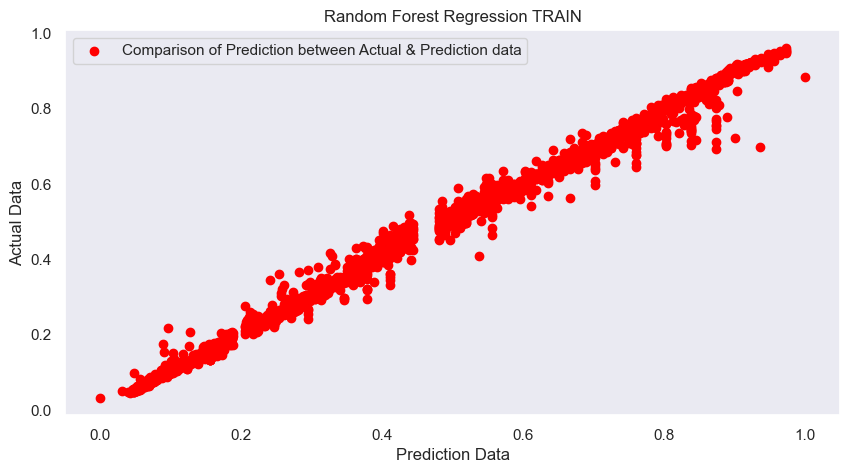

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_train_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TRAIN')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

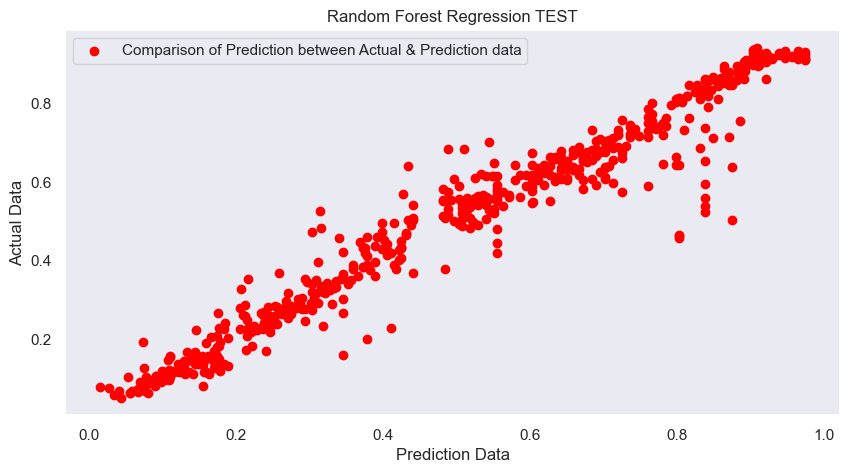

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TEST')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

In [15]:
plot_tree(regressor.estimators_[0],
              filled = True,
              feature_names=X_train.columns,
              fontsize=7)
plt.show()

In [16]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train_fs, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test_fs, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(regressor, X_train_fs, y_train.values.ravel(), cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9927308089244349
Mean Squared Error (MSE) 	: 0.0005583878832629066

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9523223602165546
Mean Squared Error (MSE) 	: 0.0038025433578071544

K-fold Cross validation score: 0.9364449112371689


### evaluating machine learning model predictions

To help us better evaluate the accuracy of our models and easily visualize the predictions done by model, we will create a function that plots the predicted values of `LIFE_EXPECTANCY` given by the model vs the actual `LIFE_EXPECTANCY`. We will do this for a sample country, Singapore.

C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


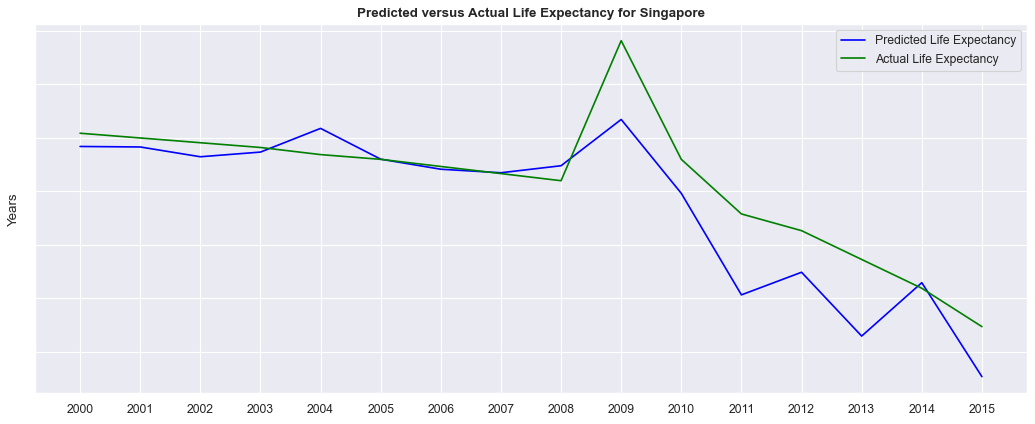

In [17]:
y_pred=life_transform[life_transform['COUNTRY']=='Singapore']['LIFE_EXPECTANCY'] #response variable
y_pred=pd.DataFrame(y_pred)
x_pred=life_transform[life_transform.columns[life_transform.columns!='LIFE_EXPECTANCY']] #predicting variables 
x_pred=x_pred[x_pred["COUNTRY"]=='Singapore']
drop=[]
for x in x_pred:
    if x not in Features:
        drop.append(x)
x_pred.drop(drop,axis=1,inplace=True)


country_preds = regressor.predict(x_pred)

# plot predicted against actual
year = [x for x in range(2000,2016)]
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
plt.xticks(year)
plt.ylabel("Years")
plt.title("Predicted versus Actual Life Expectancy for Singapore", fontweight="bold")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

# K-Means Clustering

K means clustering is an unsupervised machine learning method which aims to cluster data points which are not explicitly labelled, thus we are treating our features as unlabelled and using the clusters to see if it will improve on our current Random Forest Regression Model.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
scaler= StandardScaler()

We are making a copy of our data and transforming the copy and doing clustering on the copy to obtain the clusters. Copying ensures the original data we are supposed to perform regression on is not affected.

In [19]:
life_transform_copy=life_transform.copy(deep=True)
life_transform_copy[['LIFE_EXPECTANCY_T',
             'ADULT_MORTALITY_T',
             'INFANT_DEATHS_T',
             'ALCOHOL_T',
             'PERCENTAGE_EXPENDITURE_T',
             'HEPATITIS_B_T',
             'MEASLES_T',
             'BMI_T',
             'UNDER_FIVE_DEATHS_T',
             'POLIO_T',
             'TOTAL_EXPENDITURE_T',
             'DIPHTHERIA_T',
             'HIV/AIDS_T',
             'GDP_T',
             'POPULATION_T',
             'THINNESS_5_to_19_YEARS_T',
             'INCOME_COMPOSITION_OF_RESOURCES_T',
             'SCHOOLING_T']]=scaler.fit_transform(life_transform_copy[['LIFE_EXPECTANCY',
                                                         'ADULT_MORTALITY',
                                                         'INFANT_DEATHS',
                                                         'ALCOHOL',
                                                         'PERCENTAGE_EXPENDITURE',
                                                         'HEPATITIS_B',
                                                         'MEASLES',
                                                         'BMI',
                                                         'UNDER_FIVE_DEATHS',
                                                         'POLIO',
                                                         'TOTAL_EXPENDITURE',
                                                         'DIPHTHERIA',
                                                         'HIV/AIDS',
                                                         'GDP',
                                                         'POPULATION',
                                                         'THINNESS_5_to_19_YEARS',
                                                         'INCOME_COMPOSITION_OF_RESOURCES',
                                                         'SCHOOLING']])

In [20]:
life_transform_copy

,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS_T,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T
0,Afghanistan,Developing,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,0.255359,-3.091774,0.255313,-0.703828,-0.323445,-0.616446,-0.283994,2.634083,-0.685459,-0.583097
1,Afghanistan,Developing,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,0.274060,-1.007902,0.259609,-0.820601,-0.323445,-0.615297,-0.542461,2.687818,-0.696497,-0.607519
2,Afghanistan,Developing,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,0.292761,-0.847604,0.248869,-0.742752,-0.323445,-0.614527,-0.299504,2.730806,-0.718574,-0.631942
3,Afghanistan,Developing,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,0.317696,-0.647232,0.332643,-0.625979,-0.323445,-0.612983,-0.516394,2.784541,-0.744330,-0.656365
4,Afghanistan,Developing,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,0.342631,-0.607158,0.193019,-0.587055,-0.323445,-0.637489,-0.521951,2.838277,-0.777446,-0.729632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,-0.000223,-0.647232,0.034063,-0.703828,6.275044,-0.621695,-0.446142,0.946800,-0.950381,-0.802900
2934,Zimbabwe,Developing,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,-0.006456,-3.051699,-0.096969,-0.587055,6.885650,-0.621736,-0.447253,1.043523,-0.909907,-0.729632
2935,Zimbabwe,Developing,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,-0.012690,-0.406786,-0.094821,-0.470282,7.496256,-0.637739,-0.544024,-0.804966,-0.876792,-0.607519
2936,Zimbabwe,Developing,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,-0.018924,-0.286562,-0.174299,-0.314585,7.949287,-0.617888,-0.449325,-0.718990,-0.876792,-0.656365


In [21]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [23]:
life_filled_num=life_filled.drop(['COUNTRY','STATUS'],axis=1)
life_filled_num

,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,...,UNDER_FIVE_DEATHS_T,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,0.255359,-3.091774,0.255313,-0.703828,-0.323445,-0.616446,-0.283994,2.634083,-0.685459,-0.583097
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,0.274060,-1.007902,0.259609,-0.820601,-0.323445,-0.615297,-0.542461,2.687818,-0.696497,-0.607519
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,0.292761,-0.847604,0.248869,-0.742752,-0.323445,-0.614527,-0.299504,2.730806,-0.718574,-0.631942
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,0.317696,-0.647232,0.332643,-0.625979,-0.323445,-0.612983,-0.516394,2.784541,-0.744330,-0.656365
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,0.342631,-0.607158,0.193019,-0.587055,-0.323445,-0.637489,-0.521951,2.838277,-0.777446,-0.729632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,-0.000223,-0.647232,0.034063,-0.703828,6.275044,-0.621695,-0.446142,0.946800,-0.950381,-0.802900
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,-0.006456,-3.051699,-0.096969,-0.587055,6.885650,-0.621736,-0.447253,1.043523,-0.909907,-0.729632
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,-0.012690,-0.406786,-0.094821,-0.470282,7.496256,-0.637739,-0.544024,-0.804966,-0.876792,-0.607519
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,-0.018924,-0.286562,-0.174299,-0.314585,7.949287,-0.617888,-0.449325,-0.718990,-0.876792,-0.656365


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


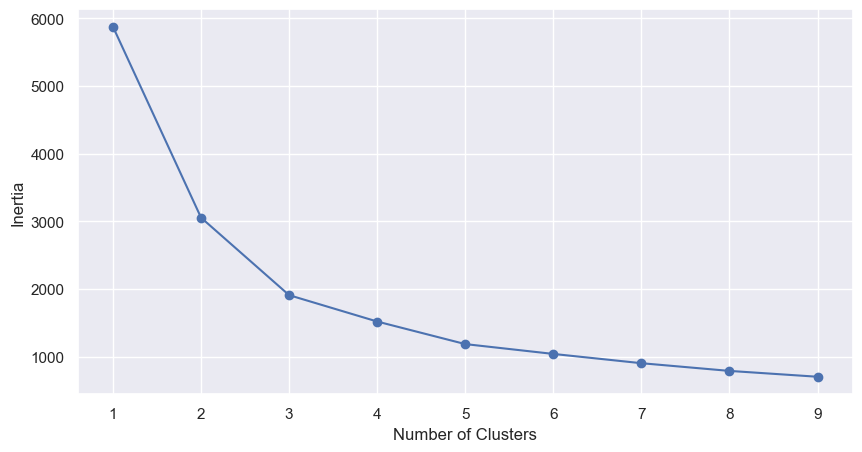

In [25]:
optimise_k_means(life_filled_num[['BMI_T','ADULT_MORTALITY_T']],10)

In [26]:
kmeans=KMeans(n_clusters=3)

In [28]:
kmeans.fit(life_filled_num[['BMI_T','ADULT_MORTALITY_T']])

KMeans(n_clusters=3)

In [29]:
life_filled_num['kmeans_3']=kmeans.labels_

In [31]:
life_filled_num

,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,...,POLIO_T,TOTAL_EXPENDITURE_T,DIPHTHERIA_T,HIV/AIDS_T,GDP_T,POPULATION_T,THINNESS_5_to_19_YEARS_T,INCOME_COMPOSITION_OF_RESOURCES_T,SCHOOLING_T,kmeans_3
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,-3.091774,0.255313,-0.703828,-0.323445,-0.616446,-0.283994,2.634083,-0.685459,-0.583097,2
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,-1.007902,0.259609,-0.820601,-0.323445,-0.615297,-0.542461,2.687818,-0.696497,-0.607519,2
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,-0.847604,0.248869,-0.742752,-0.323445,-0.614527,-0.299504,2.730806,-0.718574,-0.631942,2
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,-0.647232,0.332643,-0.625979,-0.323445,-0.612983,-0.516394,2.784541,-0.744330,-0.656365,2
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,-0.607158,0.193019,-0.587055,-0.323445,-0.637489,-0.521951,2.838277,-0.777446,-0.729632,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,-0.647232,0.034063,-0.703828,6.275044,-0.621695,-0.446142,0.946800,-0.950381,-0.802900,2
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,-3.051699,-0.096969,-0.587055,6.885650,-0.621736,-0.447253,1.043523,-0.909907,-0.729632,2
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,-0.406786,-0.094821,-0.470282,7.496256,-0.637739,-0.544024,-0.804966,-0.876792,-0.607519,0
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,-0.286562,-0.174299,-0.314585,7.949287,-0.617888,-0.449325,-0.718990,-0.876792,-0.656365,2


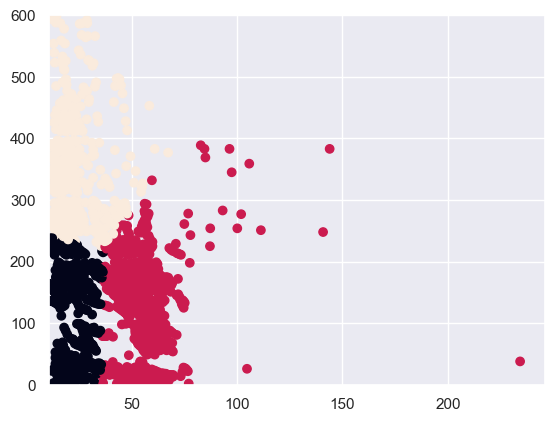

In [30]:
plt.scatter(x=life_filled_num['BMI'],y=life_filled_num['ADULT_MORTALITY'],c=life_filled_num['kmeans_3'])
plt.xlim(10.70)
plt.ylim(0,600)
plt.show()

## Create Multiple Clusters

In [33]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(life_filled_num[['BMI_T','ADULT_MORTALITY_T']])
    life_filled_num[f'KMeans_{k}']=kmeans.labels_

C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


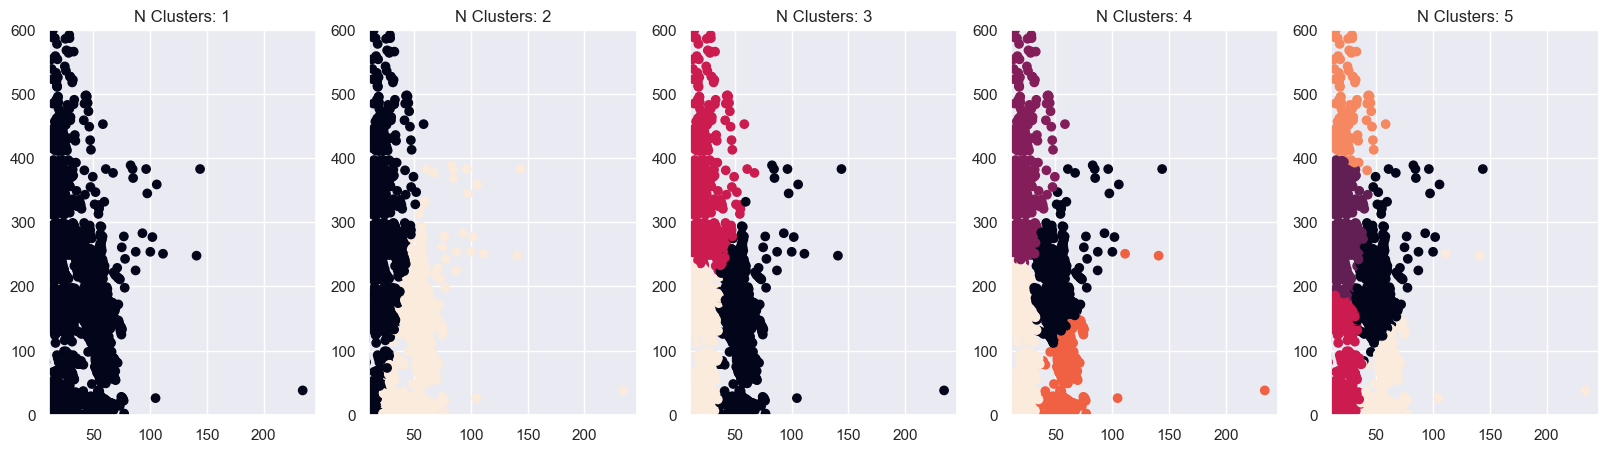

In [34]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,ax in enumerate(fig.axes, start=1):
    ax.scatter(x=life_filled_num['BMI'],y=life_filled_num['ADULT_MORTALITY'],c=life_filled_num[f'KMeans_{i}'])
    ax.set_xlim(10.70)
    ax.set_ylim(0,600)
    ax.set_title(f'N Clusters: {i}')